# Database II Project
## by Lou GOBIN, Théo JAOUDET and Cédric DELRIEUX
### Link of the GitHub with all the datasets files : https://github.com/tatouti/DatabasePD
### Link of the dataset Erasmus Mobility : https://www.kaggle.com/datasets/donjoeml/erasmus-mobility-statistics-2014-2019/data
### Link of the dataset Global Cost of Living : https://www.kaggle.com/datasets/mvieira101/global-cost-of-living
### Link of the World University Rankings : https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023

### Introduction to Erasmus +
Expliquer ce qu'est Erasmus+ en qlq phrases
### Data description : (Expliquer en une ligne chaque dataset)
1. **Erasmus Mobility** :
2. **Global Cost of Living** : 
3. **World University Ranking** : 

### Objectives of this Data Analysis : 
(Expliquer le but recherché)


## I. Start of the Data Processing

### Import of the libraries 

In [2]:
# Pandas for data processing 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Library for numpy
import numpy as np
from numpy import random

# Library to get countries codes
import pycountry

# Regex for string values
import re

# Library to read zip file
import zipfile

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for dataframe display
from IPython.display import display, HTML

c:\Users\theoj\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### 1. Loading and cleaning of the first dataset  -> Erasmus Mobility Statistics

In [3]:
#erasmus_df = pd.read_csv("Erasmus_mobility_statistics_2014_2019.csv",sep=',',low_memory=False)
zf = zipfile.ZipFile('Erasmus_mobility_statistics_2014_2019.zip') 
erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))
pd.set_option('display.max_columns', None)

erasmus_df=erasmus_df.dropna()
erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

erasmus_df

<ipython-input-3-45fbf7dc0613>:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))


,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,42,AT,Wels,BRG Wels Wallererstraße,ES,Malaga,Escuela de Idiomas Nerja,1.0
1,2014-2015,2014-07,2014-08,7.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,25,AT,Wels,BRG Wels Wallererstraße,UK,Canterbury,Pilgrims LTD,1.0
2,2014-2015,2014-07,2014-08,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,51,AT,Wels,BRG Wels Wallererstraße,UK,London,St. Giles International,1.0
3,2014-2015,2014-08,2014-08,12.0,Staff training abroad,Language acquisition,CZ,??? - ? Unknown ?,Female,Staff,No,No,No,34,AT,Wels,BRG Wels Wallererstraße,UK,London,EF Language Center,1.0
4,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,No,53,AT,Schwarzach,Volksschule Schwarzach,IE,Dublin,Centre of English Studies,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462263,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,24,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462264,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,32,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462265,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,No,37,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462266,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Male,Staff,No,No,No,41,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0


#### Cleaning and dropping more columns

In [4]:
def drop_ages(x):
    if int(x) > 70 or int(x) < 10:
        return np.nan
    else:
        return x
    
def getCountry(x):
    country = pycountry.countries.get(alpha_2=x)
    if country != None:
        return country.name
    else:
        return x

In [5]:
#Delete the staff an teaching to focus on students
erasmus_df = erasmus_df[erasmus_df['Participant Profile']!='Staff']

#Cleaning the columns
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)
erasmus_df=erasmus_df.dropna()
erasmus_df = erasmus_df.drop(columns = ['Activity (mob)','Participant Profile','GroupLeader'])

erasmus_df = erasmus_df[erasmus_df['Mobility Duration']<=500]

erasmus_df = erasmus_df[erasmus_df['Participant Nationality'] != '-']

erasmus_df['Sending City'] = erasmus_df['Sending City'].str.capitalize()
erasmus_df['Receiving City'] = erasmus_df['Receiving City'].str.capitalize()
erasmus_df['Sending Organization'] = erasmus_df['Sending Organization'].str.title()
erasmus_df['Receiving Organization'] = erasmus_df['Receiving Organization'].str.title()

erasmus_df['Field of Education'] = erasmus_df['Field of Education'].replace("? Unknown ?","Other")

erasmus_df['Education Level'] = erasmus_df['Education Level'].replace("? Unknown ?","Unknown")
erasmus_df['Education Level'] = erasmus_df['Education Level'].replace("??? - ? Unknown ?","Unknown")

#Datatype changes
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].astype('int')
erasmus_df['Mobility Duration'] = erasmus_df['Mobility Duration'].astype('int')
erasmus_df['Participants'] = erasmus_df['Participants'].astype('int')

# Country name changes
erasmus_df['Sending Country Code'] = erasmus_df['Sending Country Code'].map(getCountry).replace({"UK":"United Kingdom"})
erasmus_df['Receiving Country Code'] = erasmus_df['Receiving Country Code'].map(getCountry).replace({"UK":"United Kingdom"})
erasmus_df['Participant Nationality'] = erasmus_df['Participant Nationality'].map(getCountry).replace({"UK":"United Kingdom"})
erasmus_df = erasmus_df.rename(columns={'Sending Country Code':'Sending Country',
                                        'Receiving Country Code':'Receiving Country'})


erasmus_df

,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Field of Education,Participant Nationality,Education Level,Participant Gender,Special Needs,Fewer Opportunities,Participant Age,Sending Country,Sending City,Sending Organization,Receiving Country,Receiving City,Receiving Organization,Participants
254,2014-2015,2014-06,2014-08,84,"Hotel, restaurants and catering",Austria,Unknown,Female,No,No,16,Austria,Bregenz,Schulverein Sacré Coeur Riedenburg,Malta,Mellieha,Radisson Blu Resort And Spa Golden Sands,1
255,2014-2015,2014-06,2014-08,84,"Hotel, restaurants and catering",Austria,Unknown,Female,No,No,17,Austria,Bregenz,Schulverein Sacré Coeur Riedenburg,Malta,Mellieha,Radisson Blu Resort And Spa Golden Sands,1
256,2014-2015,2014-06,2014-08,90,"Hotel, restaurants and catering",Austria,Unknown,Female,No,No,17,Austria,Bregenz,Schulverein Sacré Coeur Riedenburg,France,Eze,Chateau Eza,1
257,2014-2015,2014-06,2014-09,84,"Hotel, restaurants and catering",Austria,Unknown,Female,No,No,16,Austria,Bregenz,Schulverein Sacré Coeur Riedenburg,Germany,Oberstaufen,Hotel Allgäu Sonne,1
258,2014-2015,2014-06,2014-09,84,"Hotel, restaurants and catering",Austria,Unknown,Female,No,No,17,Austria,Bregenz,Schulverein Sacré Coeur Riedenburg,Germany,Oberstaufen,Hotel Allgäu Sonne,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462186,2019-2020,2019-10,2019-11,12,Other,United Kingdom,Unknown,Female,No,Yes,22,United Kingdom,Royal leamington spa,Youth Interlink,Estonia,Tallinn,Noorteühing Tugiõpilaste Oma Ring Eestis,1
3462187,2019-2020,2019-10,2019-11,12,Other,United Kingdom,Unknown,Male,No,No,31,United Kingdom,Royal leamington spa,Youth Interlink,Estonia,Tallinn,Noorteühing Tugiõpilaste Oma Ring Eestis,1
3462188,2019-2020,2019-10,2019-11,12,Other,United Kingdom,Unknown,Male,No,No,35,United Kingdom,Royal leamington spa,Youth Interlink,Estonia,Tallinn,Noorteühing Tugiõpilaste Oma Ring Eestis,1
3462189,2019-2020,2019-10,2019-11,12,Other,United Kingdom,Unknown,Male,No,Yes,21,United Kingdom,Royal leamington spa,Youth Interlink,Estonia,Tallinn,Noorteühing Tugiõpilaste Oma Ring Eestis,3


In [6]:
print("There are  {}  exchange students in our Dataset".format(len(erasmus_df))) 
print("There are {} features (columns) in our dataset".format(len(erasmus_df.columns)))

There are  2662033  exchange students in our Dataset
There are 18 features (columns) in our dataset


### 2. Loading and cleaning of the second dataset  -> Cost of living

In [7]:
zf = zipfile.ZipFile('CostOfLiving.zip') 
cof = pd.read_csv(zf.open('cost-of-living.csv'))
pd.set_option('display.max_columns', None)

# Keep only usefull columns
listToKeep = ['city','country','x1','x3','x10','x13','x4','x25','x24','x6',
              'x11','x20','x23','x27','x28','x29',
              'x36','x37','x38','x41','x44','x48','x54']
cof = cof[listToKeep]

# Rename all the columns
nameColumns = ['City','Country','Meal','McDo','Bread','Cheese','Bar Beer','Market Beer','Market Wine','Cappucino',
               'Rice','Potatoes','Water','Cigarettes','One Ticket','Monthly Pass',
               'Basics','Mobile','Internet','Cinema','Jeans','Apartment','Net Salary']
cof = cof.set_axis(nameColumns, axis=1)

# Drop the cities with no rent
cof = cof[cof['Apartment'].isna()==False]

#cof=cof.dropna()
#erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

cof

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
0,Seoul,South Korea,7.68,6.15,2.85,11.54,3.07,2.12,15.36,3.93,3.53,3.84,1.05,3.46,1.00,42.25,182.13,0.16,22.48,9.60,58.26,742.54,2689.62
1,Shanghai,China,5.69,5.69,2.61,18.35,1.14,0.94,14.24,3.98,1.22,0.84,0.64,3.56,0.57,28.47,66.00,0.03,17.07,8.54,70.49,1091.93,1419.87
2,Guangzhou,China,4.13,4.98,1.63,9.00,0.85,0.95,11.39,3.54,1.03,0.74,0.51,3.70,0.36,28.47,59.65,0.02,16.66,8.54,63.43,533.28,1211.68
3,Mumbai,India,3.68,3.68,0.50,5.88,2.46,2.27,9.83,2.48,0.83,0.44,0.35,4.30,0.25,4.91,43.57,0.01,9.33,4.30,32.77,522.40,640.81
4,Delhi,India,4.91,4.30,0.50,4.36,1.84,1.54,9.83,1.77,0.85,0.37,0.36,4.30,0.49,11.67,58.07,0.01,7.95,4.91,32.12,229.84,586.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,Broome,Australia,16.99,8.83,1.05,6.73,7.99,5.66,8.15,3.40,0.95,2.72,1.12,23.50,3.74,NaN,202.17,NaN,50.97,12.40,57.76,815.50,NaN
4945,Tirupati,India,2.46,4.30,0.57,4.91,2.21,1.91,11.05,1.47,0.64,0.44,0.36,3.99,0.21,12.28,24.93,0.01,10.75,3.07,30.92,82.90,614.09
4947,Rockhampton,Australia,14.95,8.15,1.26,6.12,4.25,3.51,8.15,3.40,1.56,2.27,1.63,25.82,2.29,91.74,106.86,0.20,42.47,11.55,94.01,781.58,3481.06
4950,Egilsstadhir,Iceland,17.01,8.50,2.86,9.21,4.25,4.25,15.24,3.90,1.98,2.13,2.13,9.92,3.19,53.15,129.93,0.25,56.70,5.32,119.30,637.85,2480.51


### 3. Loading and cleaning of the third dataset  -> University rankings

In [8]:
def calculateGenderGap(x):
    gap=0
    x = str(x)
    if(x!='nan'):
        x = x.split(' : ')
        gap = int(x[0])-int(x[1])
    return gap
# Negative result means there are more male
# Positive result means there are more female

def rankRange(x):
    if(x.startswith('=')):
        x = "1-200"
    else:
        try:
            x=int(x)
            x = "1-200"
        except:
            x = x
            
    return x

In [9]:
zf = zipfile.ZipFile('UniRanking.zip') 
rank2019 = pd.read_csv(zf.open('2019_rankings.csv'))
pd.set_option('display.max_columns', None)

# Drop some columns
rank2019 = rank2019.loc[:, ~rank2019.columns.str.endswith('_rank')]
rank2019 = rank2019.drop(columns=['aliases','subjects_offered','closed','unaccredited'])
rank2019['genderGap'] = rank2019['stats_female_male_ratio'].map(calculateGenderGap)

# Add a column
rank2019.insert(2,'rank_range',rank2019['rank'].map(rankRange))

rank2019

,rank_order,rank,rank_range,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
0,10,1,1-200,University of Oxford,96.0,91.8,99.5,99.1,67.0,96.3,United Kingdom,"20,300",11.0,40%,46 : 54,-8
1,20,2,1-200,University of Cambridge,94.8,92.1,98.8,97.1,52.9,94.3,United Kingdom,"18,750",10.9,37%,46 : 54,-8
2,30,3,1-200,Stanford University,94.7,93.6,96.8,99.9,64.6,79.3,United States,"15,878",7.4,23%,43 : 57,-14
3,40,4,1-200,Massachusetts Institute of Technology,94.2,91.9,92.7,99.9,87.6,89.0,United States,"11,231",8.7,34%,38 : 62,-24
4,50,5,1-200,California Institute of Technology,94.1,94.5,97.2,99.2,88.2,62.3,United States,"2,255",6.5,29%,33 : 67,-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,12540,1001+,1001+,Yazd University,9.8–18.9,13.6,11.1,15.8,35.5,15.8,Iran,"13,635",30.3,0%,57 : 43,14
1254,12550,1001+,1001+,Yeditepe University,9.8–18.9,14.6,9.8,10.1,49.7,22.1,Turkey,"19,705",18.6,2%,55 : 45,10
1255,12560,1001+,1001+,Yuan Ze University,9.8–18.9,16.3,14.3,16.5,49.2,27.4,Taiwan,"8,186",19.2,9%,42 : 58,-16
1256,12570,1001+,1001+,Zagazig University,9.8–18.9,12.9,7.2,18.7,34.0,38.4,Egypt,"135,036",20.6,2%,51 : 49,2


## II. Data Analysis

### 1. Erasmus Mobility analysis

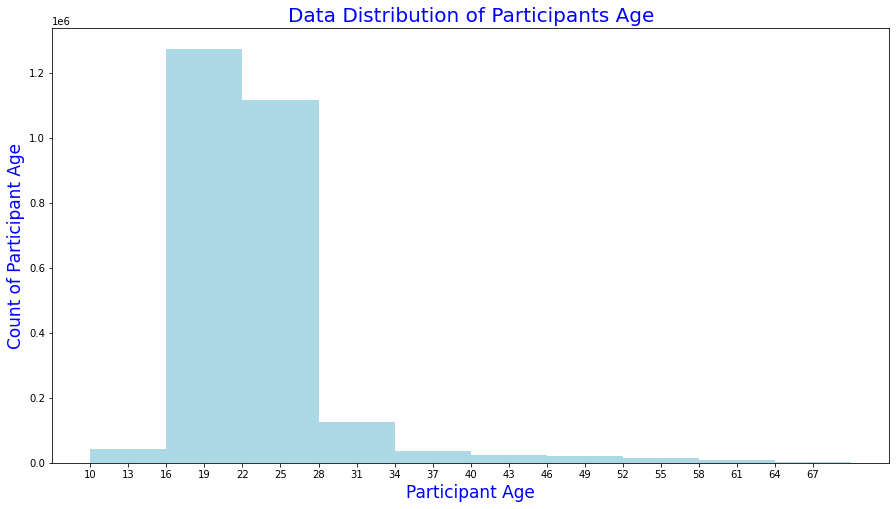

In [10]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Participant Age'],color="lightblue")

axs.set_title("Data Distribution of Participants Age", color="blue",fontsize=20)
axs.set_xticks([i for i in range(10,70,3)])
axs.set_xlabel("Participant Age", color="blue", fontsize=17)
axs.set_ylabel("Count of Participant Age", color="blue", fontsize=17)

plt.show()

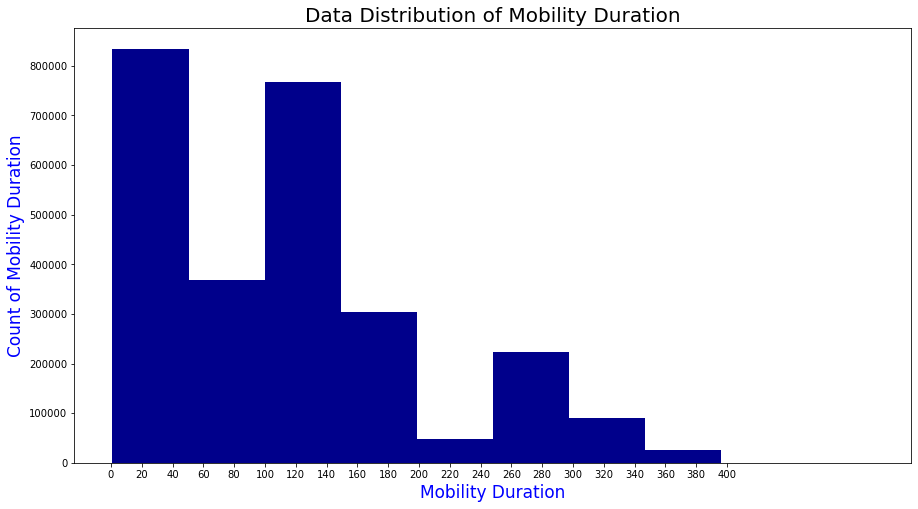

In [11]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Mobility Duration'],color="darkblue")

axs.set_title("Data Distribution of Mobility Duration", fontsize=20)
axs.set_xticks([i for i in range(0,420,20)])
axs.set_xlabel("Mobility Duration", color="blue", fontsize=17)
axs.set_ylabel("Count of Mobility Duration", color="blue", fontsize=17)

plt.show()

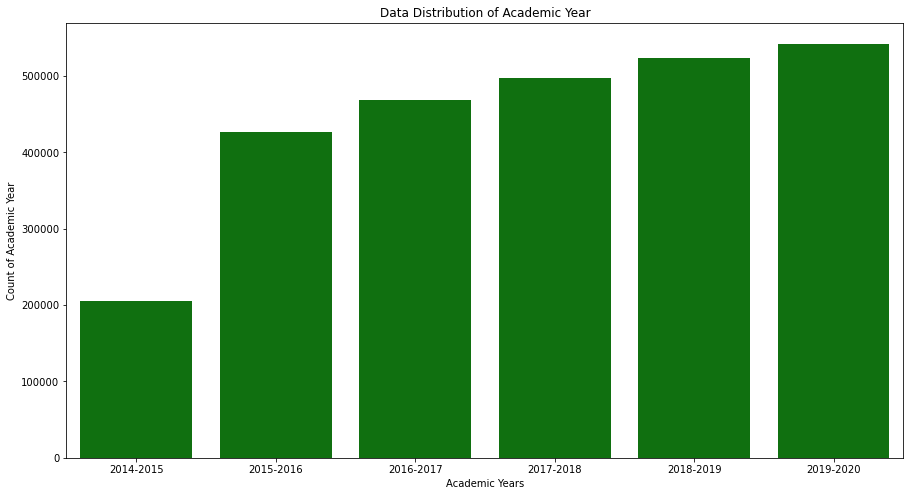

In [12]:
# Set-up the size and plots 
plt.figure(figsize=(15,8))

gfg = sns.countplot(x = "Academic Year", data=erasmus_df, color="green")
gfg.set(xlabel ="Academic Years", 
        ylabel = "Count of Academic Year", 
        title ='Data Distribution of Academic Year')

plt.show()

In [13]:
display(erasmus_df.groupby('Participant Nationality').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame(),
        erasmus_df.groupby('Sending Country').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame(),
        erasmus_df.groupby('Receiving Country').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame())


,Participants
Participant Nationality,
Germany,321566
France,321028
Spain,280081
Italy,271000
Turkey,136507


,Participants
Sending Country,
France,332014
Germany,326158
Spain,286318
Italy,273514
Turkey,137250


,Participants
Receiving Country,
Spain,368752
Germany,261884
United Kingdom,243139
Italy,224836
France,203169


In [14]:
receivingCity = erasmus_df.groupby(['Receiving City','Receiving Country']).count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame()
display(erasmus_df.groupby(['Sending City','Sending Country']).count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame(),
        receivingCity)

,,Participants
Sending City,Sending Country,
Paris,France,35391
Madrid,Spain,34343
Berlin,Germany,28165
Istanbul,Turkey,24569
Budapest,Hungary,23195


,,Participants
Receiving City,Receiving Country,
London,United Kingdom,47835
Barcelona,Spain,43076
Madrid,Spain,41090
Berlin,Germany,38511
Paris,France,36011


In [15]:
receivingUni = erasmus_df.groupby('Receiving Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants
display(receivingUni.to_frame(),
        erasmus_df.groupby('Sending Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame())

,Participants
Receiving Organization,
Universitat De Valencia,11742
Alma Mater Studiorum - Universita Di Bologna,11685
Universidad De Granada,10834
Universidade De Lisboa,10756
Universidad Complutense De Madrid,9618


,Participants
Sending Organization,
Alma Mater Studiorum - Universita Di Bologna,14744
Universidad De Granada,11599
Universita Degli Studi Di Padova,9960
Universita Degli Studi Di Roma La Sapienza,9453
Universidad Complutense De Madrid,9375


In [16]:
sending = erasmus_df['Sending Country'].value_counts().to_frame().reset_index()
receiving = erasmus_df['Receiving Country'].value_counts().to_frame().reset_index()

sending_receiving = sending.merge(receiving,left_on='Sending Country',right_on='Receiving Country')
sending_receiving['Total Amount'] = sending_receiving['count_x']+sending_receiving['count_y']

sending_receiving = sending_receiving.drop('Receiving Country',axis=1)

sending_receiving = sending_receiving.rename(columns = {"Sending Country":"Country",
                                                        "count_x":"Sending Amount",
                                                        "count_y":"Receiving Amount"}).sort_values(by='Total Amount',ascending=False)

# Get only the bigest 10 country
sending_receiving = sending_receiving.head(10)

sending_receiving = sending_receiving.set_index('Country')
sending_receiving

,Sending Amount,Receiving Amount,Total Amount
Country,,,
Spain,286318,368752,655070
Germany,326158,261884,588042
France,332014,203169,535183
Italy,273514,224836,498350
United Kingdom,123341,243139,366480
Poland,134009,139602,273611
Turkey,137250,60850,198100
Netherlands,105043,91496,196539
Portugal,72720,115357,188077


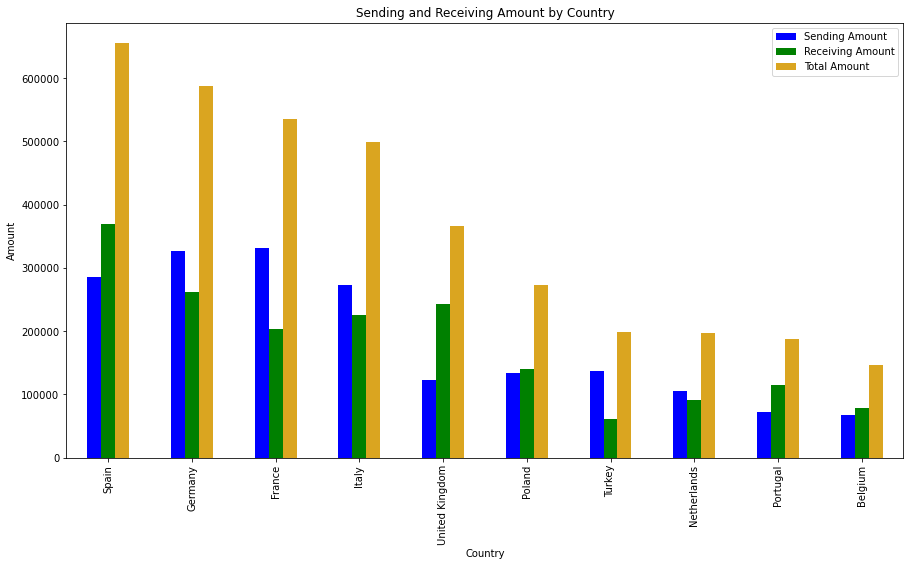

In [17]:
ax = sending_receiving.plot(kind='bar', figsize=(15, 8), rot=0,color=['Blue','Green','goldenrod'])
ax.set_title('Sending and Receiving Amount by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

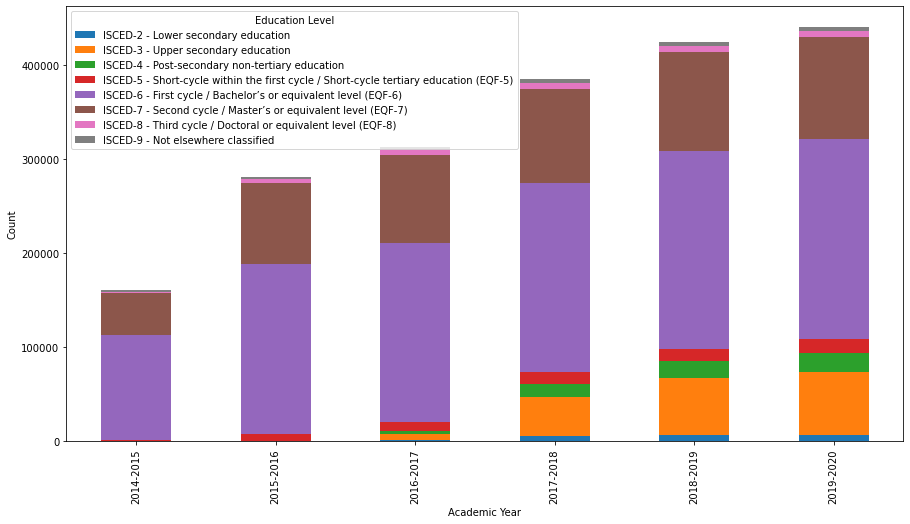

In [18]:
# group the dataframe by year and activity
grouped = erasmus_df[['Academic Year','Education Level']]
grouped = grouped[grouped['Education Level']!='Unknown']
grouped = grouped.groupby(['Academic Year', 'Education Level']).size().unstack(fill_value=0)

# create a stacked bar chart
fig, axs = plt.subplots(figsize=(15, 8))

grouped.plot(kind='bar', stacked=True, ax = axs)

# set the x-label and y-label
axs.set_xlabel('Academic Year')
axs.set_ylabel('Count')

# display the plot
plt.show()
grouped = None

Text(0.5, 1.0, 'Special Needs %')

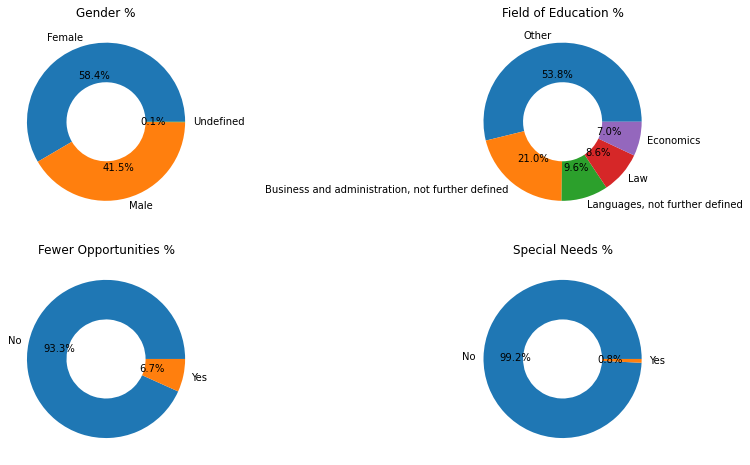

In [19]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches([15, 8])

# Gender 
gender = erasmus_df['Participant Gender'].value_counts()
axs[0, 0].pie(gender.values,
              labels = gender.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0, 0].set_title('Gender %')

# Field of education
FieldofEducation = erasmus_df['Field of Education'].value_counts().head(5)
axs[0,1].pie(FieldofEducation.values,
              labels = FieldofEducation.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0,1].set_title('Field of Education %')

# Fewer Opportunities
FewerOpportunities = erasmus_df['Fewer Opportunities'].value_counts()
axs[1,0].pie(FewerOpportunities.values,
              labels = FewerOpportunities.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1,0].set_title('Fewer Opportunities %')

# Special Needs
SpecialNeeds = erasmus_df['Special Needs'].value_counts()
axs[1, 1].pie(SpecialNeeds.values,
              labels = SpecialNeeds.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1, 1].set_title('Special Needs %')

### 2. Cost of living analysis

In [20]:
cof.sort_values(by='Net Salary',ascending=False).head(10)

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
4459,Bainbridge Island,United States,25.00,9.65,2.64,11.70,5.00,3.16,12.50,5.28,2.14,2.44,2.33,8.80,2.00,50.00,225.00,0.11,68.00,15.75,47.20,1500.00,9000.00
3049,Annapolis,United States,20.00,8.00,3.30,10.04,5.00,2.50,15.00,4.39,4.48,3.03,1.75,9.50,3.29,85.00,201.83,0.10,64.12,12.00,41.00,2375.00,8888.00
3633,Newport Beach,United States,20.00,8.00,2.54,10.83,9.00,3.57,16.00,4.18,2.10,3.17,2.25,8.00,1.50,95.00,90.00,0.22,51.00,12.00,48.00,3500.00,8466.00
3154,East Palo Alto,United States,17.50,8.00,4.67,13.23,7.00,1.21,13.00,4.47,4.20,3.74,2.25,9.25,2.50,90.00,172.50,0.16,55.15,13.00,55.44,2333.33,8346.00
3873,Des Plaines,United States,20.00,9.00,2.20,8.82,5.00,1.43,13.00,4.25,3.73,1.10,1.00,14.00,2.25,75.00,163.78,0.33,30.00,15.00,37.50,1550.00,8333.33
3433,Triesen,Liechtenstein,25.75,14.96,3.64,14.76,5.34,2.07,16.03,5.16,2.14,2.02,1.02,9.62,4.50,68.49,194.84,0.17,54.13,19.23,92.33,910.32,8061.99
3109,Foster City,United States,17.50,7.50,5.51,17.64,NaN,NaN,15.00,4.95,11.02,NaN,1.50,NaN,NaN,NaN,115.00,NaN,30.00,NaN,55.00,2600.00,8000.00
3128,Zug,Switzerland,32.05,16.03,3.36,24.25,6.68,2.01,13.09,5.58,3.16,3.15,1.03,9.08,3.63,84.41,208.50,0.20,57.67,19.23,90.82,2154.71,7935.38
2057,Bellevue,United States,30.00,9.00,3.70,14.59,6.00,2.14,16.50,5.11,5.51,2.69,1.36,9.59,2.90,90.00,201.54,0.25,65.62,12.00,48.87,2500.00,7833.33
2479,Highlands Ranch,United States,15.50,8.50,3.47,13.23,7.00,1.43,14.00,5.67,3.14,4.07,2.00,7.50,NaN,NaN,115.00,NaN,50.00,12.00,55.00,2200.00,7700.00


In [21]:
# Get only the lines with apartment and salary not null
cofRatio = cof[cof['Net Salary'].isna()==False]
cofRatio['Ratio Apart/Sal'] = cofRatio['Apartment']/cofRatio['Net Salary']*100

# Take out corrupted values
cofRatio = cofRatio[(cofRatio['Ratio Apart/Sal']<100) & (cofRatio['Ratio Apart/Sal']>10)]

cofRatio.sort_values(by='Ratio Apart/Sal',ascending=True)

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary,Ratio Apart/Sal
1005,Uijeongbu,South Korea,5.38,5.76,2.85,11.54,2.30,1.92,15.36,3.46,1.92,3.84,0.90,3.46,NaN,NaN,135.98,0.16,18.44,7.68,58.26,230.47,2304.69,10.000043
2396,Jendouba,Tunisia,0.62,1.55,0.08,5.42,0.62,0.43,2.32,0.67,0.25,0.46,0.15,1.24,0.05,2.48,23.70,0.03,18.59,3.41,13.94,46.47,463.25,10.031301
1121,Wuppertal,Germany,13.70,8.43,1.58,10.75,3.69,0.63,4.16,3.64,2.28,1.32,0.35,8.06,3.06,74.82,201.77,0.12,35.56,10.01,75.08,368.81,3628.40,10.164535
3220,Jekabpils,Latvia,7.90,5.27,1.03,7.90,2.11,1.05,5.27,2.11,0.95,0.53,0.63,4.16,1.05,22.49,149.28,0.00,18.97,7.06,43.20,105.37,1001.06,10.525843
4677,Udayagiri,India,2.46,4.30,0.47,4.61,1.84,2.05,8.60,2.01,0.66,0.45,0.36,3.87,0.61,NaN,24.64,0.01,9.29,2.70,35.31,67.55,614.09,11.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Cairo,Egypt,4.07,4.07,0.52,3.28,1.63,1.29,8.14,1.75,0.73,0.34,0.22,2.03,0.28,13.23,26.53,0.01,16.37,4.48,39.37,196.83,200.40,98.218563
529,Monaco,Monaco,26.34,9.48,3.95,14.75,7.38,2.11,13.70,4.54,3.34,1.58,2.03,10.54,2.11,37.93,184.18,NaN,57.60,10.54,83.60,5490.31,5589.37,98.227707
620,Malang,Indonesia,1.30,3.11,0.97,6.15,2.48,1.94,10.21,0.89,0.75,0.71,0.36,1.94,0.32,3.89,43.75,0.10,23.77,2.27,31.76,205.26,207.42,98.958635
4097,Pontes e Lacerda,Brazil,NaN,NaN,NaN,2.30,NaN,1.92,5.75,NaN,2.11,2.87,0.57,2.87,NaN,NaN,133.24,NaN,18.97,NaN,17.22,229.91,232.21,99.009517


In [22]:
# Per country
cofCountry = cof.drop('City',axis=1).groupby('Country').mean()
cofCountry.sort_values(by='McDo',ascending=True).head(10)

,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
Country,,,,,,,,,,,,,,,,,,,,,
Burkina Faso,0.800000,2.090000,1.030000,NaN,1.120000,0.920000,5.620000,1.610000,0.850000,1.690000,0.790000,1.610000,0.320000,14.460000,96.390000,0.270000,35.820000,2.010000,12.850000,401.610000,426.370000
Guinea-Bissau,2.620000,2.210000,0.240000,NaN,1.010000,0.880000,5.620000,2.410000,0.800000,0.760000,0.800000,1.610000,NaN,NaN,16.060000,0.180000,NaN,1.610000,88.350000,346.160000,1008.780000
Swaziland,3.115000,2.340000,0.590000,7.430000,0.975000,0.830000,4.510000,1.175000,1.280000,0.800000,0.630000,2.090000,1.140000,29.940000,92.190000,0.130000,54.355000,3.140000,54.320000,278.480000,532.250000
Cameroon,2.543333,2.610000,0.613333,17.093333,1.093333,1.015000,4.820000,1.050000,1.003333,1.285000,0.596667,1.631667,1.598000,8.035000,74.806667,0.128333,41.030000,6.423333,23.301667,104.521667,229.777500
Eritrea,11.400000,2.670000,0.500000,NaN,1.000000,1.000000,NaN,1.060000,1.870000,1.560000,1.580000,2.500000,0.220000,NaN,30.000000,0.100000,NaN,1.000000,30.000000,650.000000,1060.000000
Algeria,2.022857,2.763704,0.189259,5.213077,1.431250,1.390435,7.146522,0.511111,0.988966,0.514643,0.270690,2.121786,0.212308,8.880667,40.312692,0.064483,33.906667,4.454167,29.257778,145.281034,259.595769
Philippines,2.978246,2.777018,1.172037,5.895370,1.252778,1.105769,6.443333,2.174727,0.887018,1.567407,0.681250,2.553750,0.299767,12.210357,97.866429,0.142143,36.231228,4.742182,36.545714,263.838421,291.160638
Tunisia,1.750526,2.865789,0.109474,6.971176,1.056667,0.822353,3.951765,0.596316,0.693158,0.438947,0.231053,2.414444,0.225263,9.194118,33.038421,0.058889,18.660526,3.651111,27.816316,126.891053,287.027895
Uzbekistan,3.454286,2.920000,0.340000,3.950000,0.902857,0.896667,2.440000,1.360000,1.090000,0.490000,0.294286,1.960000,0.191429,11.421667,45.048333,0.018333,15.844286,2.570000,25.566667,222.907143,242.041429


### 3. University Ranking analysis

In [55]:
tempUni = list(receivingUni.index)
print("Top 5 receiving univerisities",tempUni)
tempUniFinal=[]
for u in tempUni: # Only get the city of the uni (taking the last word)
    u = u.split(" ")
    tempUniFinal.append(u[-1])
print("Citites of thoses 5 univerisities",tempUniFinal)
rank2019[rank2019['name'].str.contains('|'.join(tempUniFinal))]

Top 5 receiving univerisities ['Universitat De Valencia', 'Alma Mater Studiorum - Universita Di Bologna', 'Universidad De Granada', 'Universidade De Lisboa', 'Universidad Complutense De Madrid']
Citites of thoses 5 univerisities ['Valencia', 'Bologna', 'Granada', 'Lisboa', 'Madrid']


,rank_order,rank,rank_range,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
179,1800,180,1-200,University of Bologna,54.7,51.2,32.6,82.7,43.9,49.2,Italy,"66,998",23.9,11%,57 : 43,14
355,3560,351–400,351–400,Autonomous University of Madrid,41.7–43.9,33.9,28.4,64.8,37.8,51.1,Spain,"29,532",13.4,14%,59 : 41,18
417,4180,401–500,401–500,Complutense University of Madrid,37.1–41.6,42.4,28.4,42.7,35.6,44.3,Spain,"64,466",20.1,14%,61 : 39,22
496,4970,401–500,401–500,University of Valencia,37.1–41.6,28.0,19.6,68.0,36.3,44.9,Spain,"50,927",16.7,11%,62 : 38,24
624,6250,601–800,601–800,Carlos III University of Madrid,26.0–33.4,26.4,16.0,37.3,37.8,58.6,Spain,"16,917",11.0,15%,43 : 57,-14
660,6610,601–800,601–800,University of Granada,26.0–33.4,23.5,19.0,48.3,35.0,47.0,Spain,"52,989",14.9,10%,57 : 43,14
740,7410,601–800,601–800,Polytechnic University of Valencia,26.0–33.4,25.4,12.0,45.2,44.5,47.5,Spain,"21,945",9.4,13%,38 : 62,-24
775,7760,601–800,601–800,Technical University of Madrid,26.0–33.4,31.1,13.9,37.9,42.6,47.5,Spain,"39,269",13.2,13%,32 : 68,-36


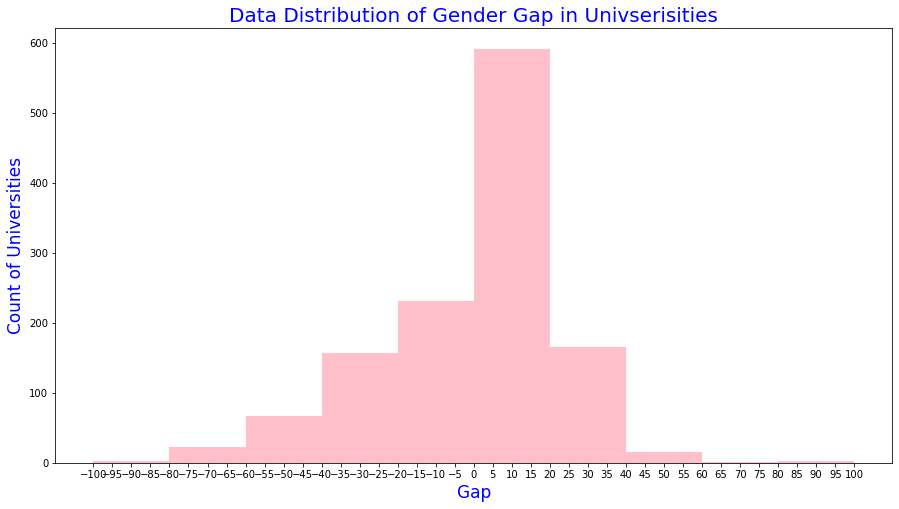

In [56]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])

axs.hist(rank2019['genderGap'],color="pink")

axs.set_title("Data Distribution of Gender Gap in Univserisities", color="blue",fontsize=20)
axs.set_xticks([i for i in range(-100,105,5)])
axs.set_xlabel("Gap", color="blue", fontsize=17)
axs.set_ylabel("Count of Universities", color="blue", fontsize=17)

plt.show()

<AxesSubplot:xlabel='Rank Range', ylabel='Gap Value'>

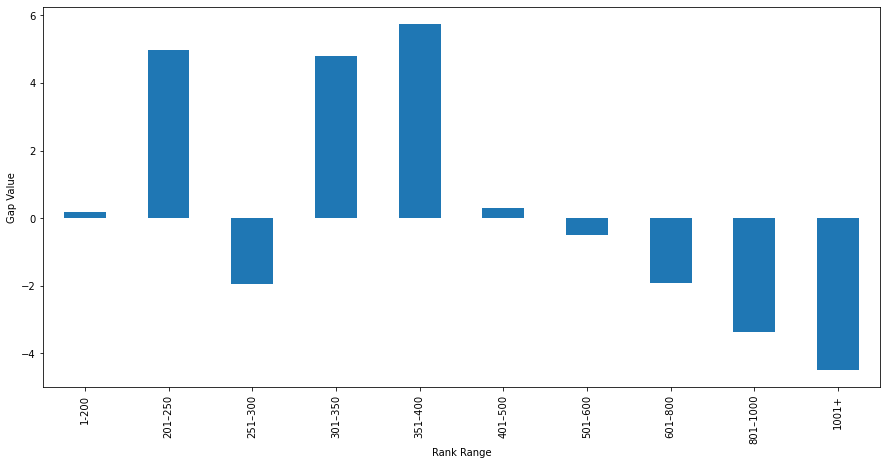

In [57]:
rank2019Range = rank2019[['rank_range','genderGap']].groupby('rank_range').mean()
rank2019Range.loc[len(rank2019Range)] = rank2019Range.loc['1001+']
rank2019Range=rank2019Range.drop('1001+')
rank2019Range = rank2019Range.rename(index={10:'1001+'})

rank2019Range['genderGap'].plot(kind='bar',xlabel='Rank Range',ylabel='Gap Value',figsize=(15,7))

In [58]:
usUni = erasmus_df[erasmus_df['Receiving Country']=='United States']
usUni = list(usUni['Receiving Organization'].unique())

tempUni = usUni
#print("US Universities",tempUni)
tempUniFinal=[]
for u in tempUni: # Only get the city of the uni
    u = u.split(" ")
    tempUniFinal.append(u[-1])
print(tempUniFinal)
tempUniFinal2=[]
for i in tempUniFinal:
        if((i!='University') and (i!='College') and (i!='Institute')and (i!='School')and (i!='System')):
            tempUniFinal2.append(i)
print("Citites of thoses 5 univerisities",tempUniFinal2)
rank2019[rank2019['name'].str.contains('|'.join(tempUniFinal2))]


#bestUni = ['Oxford','Cambridge','Stanford','Massachusetts']

['University', 'Arts', 'Foundation', 'Rico', 'University', 'University', 'Rochester', 'Music', 'Music', 'Michigan', 'System', 'College', 'University', 'University', 'Connecticut', 'Art', 'University', 'Shik', 'Florida', 'School', 'System', 'Vegas', 'College', 'University', 'Colorado', 'California', 'University', 'York', 'Regents', 'College', 'Technology', 'Urbana-Champaign', 'Pittsburgh', 'College', 'Pennsylvania', 'York', 'Chicago', 'Hill', 'Marcos', 'College', 'University', 'Crosse', 'Carolina', 'Corporation', 'Pennsylvania', 'College', 'University', 'Inc.', 'York', 'University', 'Arlington', 'University', 'Omaha', 'Colorado', 'College', 'Carbondale', 'Buffalo', 'University', 'Bay', 'Iowa', 'Boston', 'University', 'University', 'County', 'Greensboro', 'University', 'University', 'University', 'Illinois', 'University', 'Pennsylvania', 'Institute', 'Charleston', 'University', 'College', 'Arkansas', 'University', 'University', 'Indianapolis', 'University', 'Bay', 'College', 'University'

,rank_order,rank,rank_range,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
3,40,4,1-200,Massachusetts Institute of Technology,94.2,91.9,92.7,99.9,87.6,89.0,United States,"11,231",8.7,34%,38 : 62,-24
4,50,5,1-200,California Institute of Technology,94.1,94.5,97.2,99.2,88.2,62.3,United States,"2,255",6.5,29%,33 : 67,-34
9,100,10,1-200,The University of Chicago,90.2,90.2,90.1,99.0,41.4,70.9,United States,"13,562",6.1,25%,44 : 56,-12
12,130,=12,1-200,University of Pennsylvania,89.0,87.4,89.2,98.4,70.3,63.6,United States,"20,443",6.4,20%,52 : 48,4
14,150,15,1-200,"University of California, Berkeley",87.7,78.7,92.3,99.7,49.3,69.8,United States,"36,468",13.2,17%,51 : 49,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,12130,1001+,1001+,SRM Institute of Science and Technology,9.8–18.9,14.2,7.8,14.0,34.2,16.4,India,"47,375",16.4,2%,21 : 79,-58
1214,12150,1001+,1001+,St Petersburg Electrotechnical University (LETI),9.8–18.9,18.8,10.4,19.5,57.6,26.2,Russian Federation,"8,418",13.1,12%,30 : 70,-40
1225,12260,1001+,1001+,TOBB University of Economics and Technology,9.8–18.9,15.2,10.9,27.1,34.7,25.4,Turkey,"5,474",16.5,1%,46 : 54,-8
1230,12310,1001+,1001+,Tokyo University of Marine Science and Technology,9.8–18.9,22.7,14.0,9.5,50.3,31.1,Japan,"2,686",11.0,7%,33 : 67,-34


<AxesSubplot:xlabel='location'>

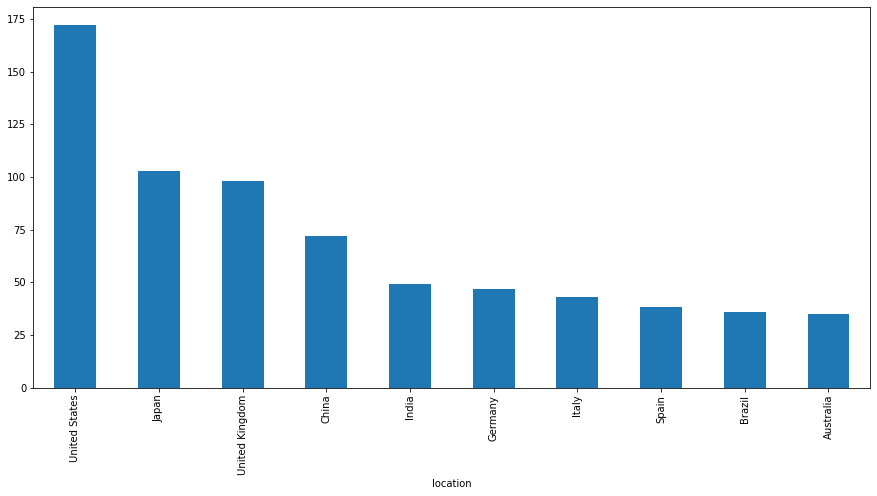

In [59]:
a=rank2019.groupby('location').count().sort_values(by='rank_order',ascending=False).head(10)
a['rank'].plot(kind='bar',figsize=(15,7))

## III. Cross data analysis

In [60]:
tempCity,tempCountry=[],[]
for i in range(len(receivingCity.index)):
    tempCity.append(receivingCity.index[i][0])
    tempCountry.append(receivingCity.index[i][1])
    
cofRatio[(cofRatio['City'].isin(tempCity)) & (cofRatio['Country'].isin(tempCountry))]

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary,Ratio Apart/Sal
28,London,United Kingdom,18.45,8.61,1.25,7.92,7.26,2.38,11.07,4.14,2.15,1.41,1.38,15.99,3.20,184.50,299.36,0.13,35.92,14.76,89.10,2417.07,4033.84,59.919828
32,Paris,France,15.81,10.54,2.11,17.51,7.38,2.11,8.43,3.89,2.29,2.30,0.85,11.06,2.00,79.03,199.44,0.18,31.36,13.17,103.86,1365.19,2752.34,49.601067
80,Madrid,Spain,12.64,8.43,1.09,10.67,3.69,1.03,5.27,2.23,1.22,1.21,0.72,5.27,1.58,57.48,166.08,0.18,38.10,9.48,77.06,1056.14,2089.54,50.544139
120,Barcelona,Spain,14.75,9.48,1.50,12.32,3.16,1.16,6.32,2.35,1.35,1.40,0.81,5.27,2.53,42.15,170.85,0.23,40.15,9.48,77.21,1083.72,1978.23,54.782305
144,Berlin,Germany,12.64,9.48,1.70,12.69,4.21,1.13,5.90,3.37,2.43,2.00,0.69,8.43,3.16,89.57,308.30,0.11,40.24,12.64,88.38,1321.90,3158.05,41.858109


<AxesSubplot:title={'center':'Where the French go the most'}, xlabel='Receiving Country'>

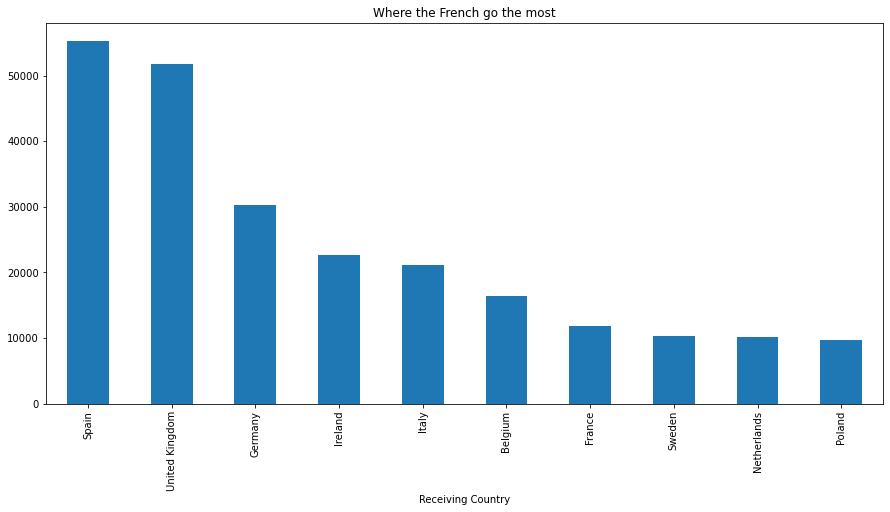

In [61]:
erasmusFR=erasmus_df[erasmus_df['Participant Nationality']=='France'].groupby('Receiving Country').count().sort_values(by='Academic Year',ascending=False).head(10).Participants
erasmusFR.plot(kind='bar',title="Where the French go the most",figsize=(15,7))

In [62]:
cofFr = cof.drop('City',axis=1)
display(cofFr[cofFr["Country"].isin(erasmusFR.index)].groupby('Country').mean().sort_values(by='Market Wine',ascending=True).head(),
        cofFr[cofFr["Country"].isin(erasmusFR.index)].groupby('Country').mean().sort_values(by='Cheese',ascending=True).Cheese.head().to_frame())

,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
Country,,,,,,,,,,,,,,,,,,,,,
Spain,11.488784,7.869863,1.047222,10.803889,2.514595,0.965634,5.070000,1.742703,1.276269,1.306667,0.669178,5.425070,1.552464,38.126491,125.976164,0.182727,37.077027,8.173472,73.400270,652.215946,1656.963521
Poland,6.640417,5.697083,0.872500,6.074681,2.176444,0.769375,5.096042,2.284375,0.929362,0.612340,0.464583,4.029792,0.797111,21.464545,200.499348,0.058333,13.104255,5.585532,60.764773,438.408750,909.287381
Germany,11.897748,8.813514,1.825351,12.378137,3.879083,0.687248,5.457768,3.096330,2.036667,1.596696,0.584862,7.680893,2.934679,72.052718,255.090265,0.122500,36.383243,11.860619,77.400351,712.719052,2642.044059
Italy,15.060000,8.529748,1.675508,13.424696,4.525583,1.515897,5.710847,1.540417,2.006983,1.388000,0.477881,5.991441,1.561404,37.059813,187.396154,0.178200,29.259237,9.004958,76.915913,582.026750,1519.632155
Netherlands,17.130750,9.496667,1.895641,11.339250,5.190541,1.237436,6.120513,3.128500,2.036154,1.112632,0.772564,8.556923,3.737714,115.093235,228.984595,0.163947,44.220000,11.867692,85.038000,1116.863750,3177.985556


,Cheese
Country,
Poland,6.074681
United Kingdom,7.282705
Ireland,8.406000
Sweden,8.938462
Spain,10.803889


## IV. RDF Transformation

In [63]:
import pandas as pd
import rdfpandas

# Load the required libraries
from rdflib import Graph, Literal, RDF, URIRef, Namespace
# rdflib knows about some namespaces, like FOAF
from rdflib.namespace import FOAF, XSD

g = rdfpandas.to_graph(rank2019)
ttl = g.serialize(format = 'turtle')
#with open('investment_management_capabilities.ttl', 'wb') as file:
#   file.write(ttl)